In [1]:
!pip install skl2onnx
!pip install onnxruntime
!pip install graphviz
!pip install seaborn
!pip install scikit-optimize

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType
import onnxruntime as rt
from onnx.tools.net_drawer import GetPydotGraph, GetOpNodeProducer
import graphviz

In [4]:
data = pd.read_csv('D:/New folder/data_public.csv')

In [32]:
# 1. Data Cleaning and Exploration
# Checking for missing values
print("Missing values per column:\n", data.isnull().sum())

Missing values per column:
 A        0
B        0
C        0
D        0
E        0
F        0
G        0
H        0
I        0
J        0
K        0
L        0
M        0
N        0
O        0
Class    0
dtype: int64


In [33]:
print("\nClass distribution:\n", data['Class'].value_counts())


Class distribution:
 Class
3    569521
2    449885
1    180594
Name: count, dtype: int64


In [34]:
data.head()

A          B           C          D           E          F  \
0  231.420023 -12.210984  217.624839 -15.611916  140.047185  76.904999   
1  -38.019270 -14.195695    9.583547  22.293822  -25.578283 -18.373955   
2  -39.197085 -20.418850   21.023083  19.790280  -25.902587 -19.189004   
3  221.630408  -5.785352  216.725322  -9.900781  126.795177  85.122288   
4  228.558412 -12.447710  204.637218 -13.277704  138.930529  91.101870   

            G           H          I           J           K         L  \
0  131.591871  198.160805  82.873279  127.350084  224.592926 -5.992983   
1   -0.094457  -33.711852  -8.356041   23.792402    4.199023  2.809159   
2   -2.953836  -25.299219  -6.612401   26.285392    5.911292  6.191587   
3  108.857593  197.640135  82.560019  157.105143  212.989231 -3.621070   
4  115.598954  209.300011  89.961688  130.299732  201.795100 -1.573922   

           M           N           O  Class  
0 -14.689648  143.072058  153.439659      3  
1 -59.330681  -11.685950    1.317104      2  
2 -56.924996   -4.675187   -1.027830      2  
3 -15.469156  135.265859  149.212489      3  
4 -15.128603  148.368622  147.492663      3

In [35]:
# Summary statistics
print("Summary Statistics:")
print(data.describe())

Summary Statistics:
                  A             B             C             D             E  \
count  1.200000e+06  1.200000e+06  1.200000e+06  1.200000e+06  1.200000e+06   
mean   5.068656e+01 -1.883373e+01  7.162152e+01 -1.355120e+01  2.944177e+01   
std    1.292492e+02  1.446355e+01  1.052808e+02  4.689774e+01  7.282278e+01   
min   -7.308940e+01 -8.322357e+01 -5.972853e+01 -1.375818e+02 -3.829826e+01   
25%   -3.793679e+01 -1.786669e+01  7.553164e+00 -1.471337e+01 -2.436286e+01   
50%   -3.197847e+01 -1.369876e+01  1.348796e+01 -8.004308e+00 -1.897058e+01   
75%    2.280020e+02 -1.055606e+01  2.123439e+02  1.955806e+01  1.289018e+02   
max    2.687738e+02  4.460108e+00  2.561698e+02  3.263799e+01  1.579843e+02   

                  F             G             H             I             J  \
count  1.200000e+06  1.200000e+06  1.200000e+06  1.200000e+06  1.200000e+06   
mean  -6.185189e+00  3.174186e+01  5.112504e+01  3.300077e+01  4.092546e+01   
std    7.309100e+01  6.660329e+

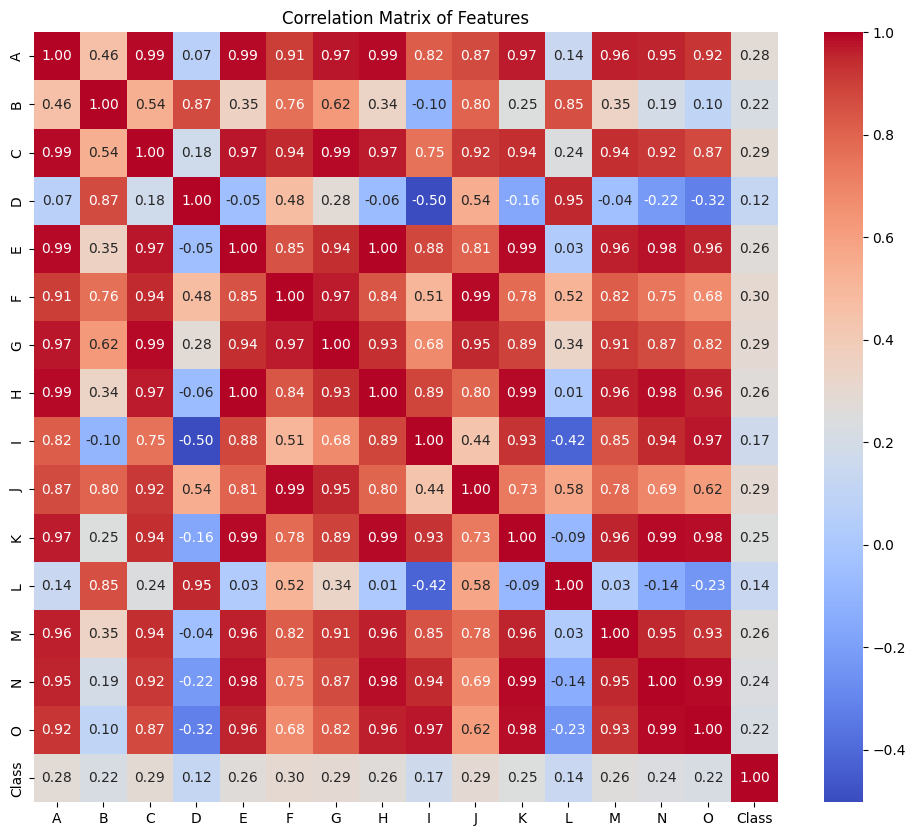

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix of Features")
plt.show()

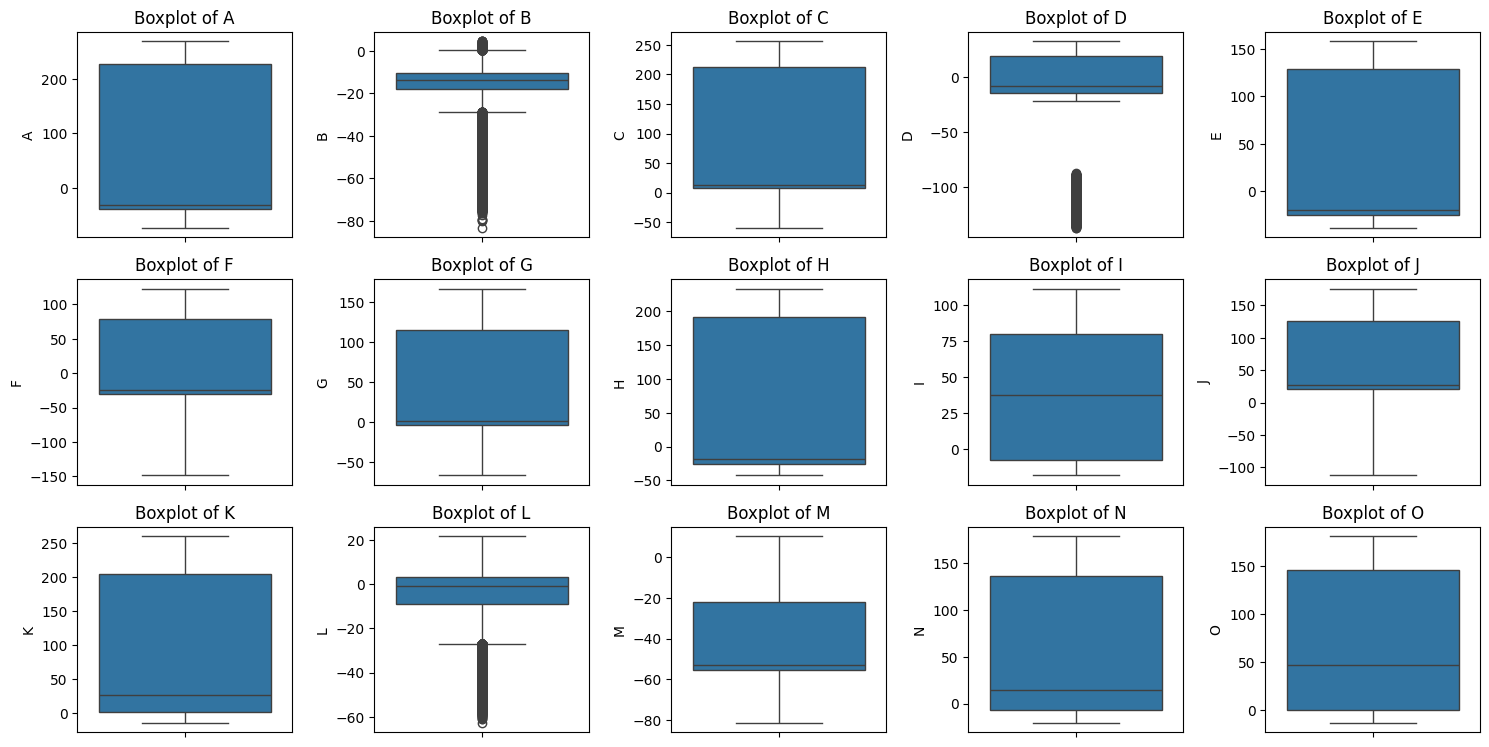

In [37]:
# Boxplots for outlier detection in each feature
# Allows us to visually inspect each feature for potential outliers, which could impact model performance
plt.figure(figsize=(15, 10))
for i, col in enumerate(data.columns[:-1], 1):  # Exclude the target column
    plt.subplot(4, 5, i)
    sns.boxplot(y=data[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

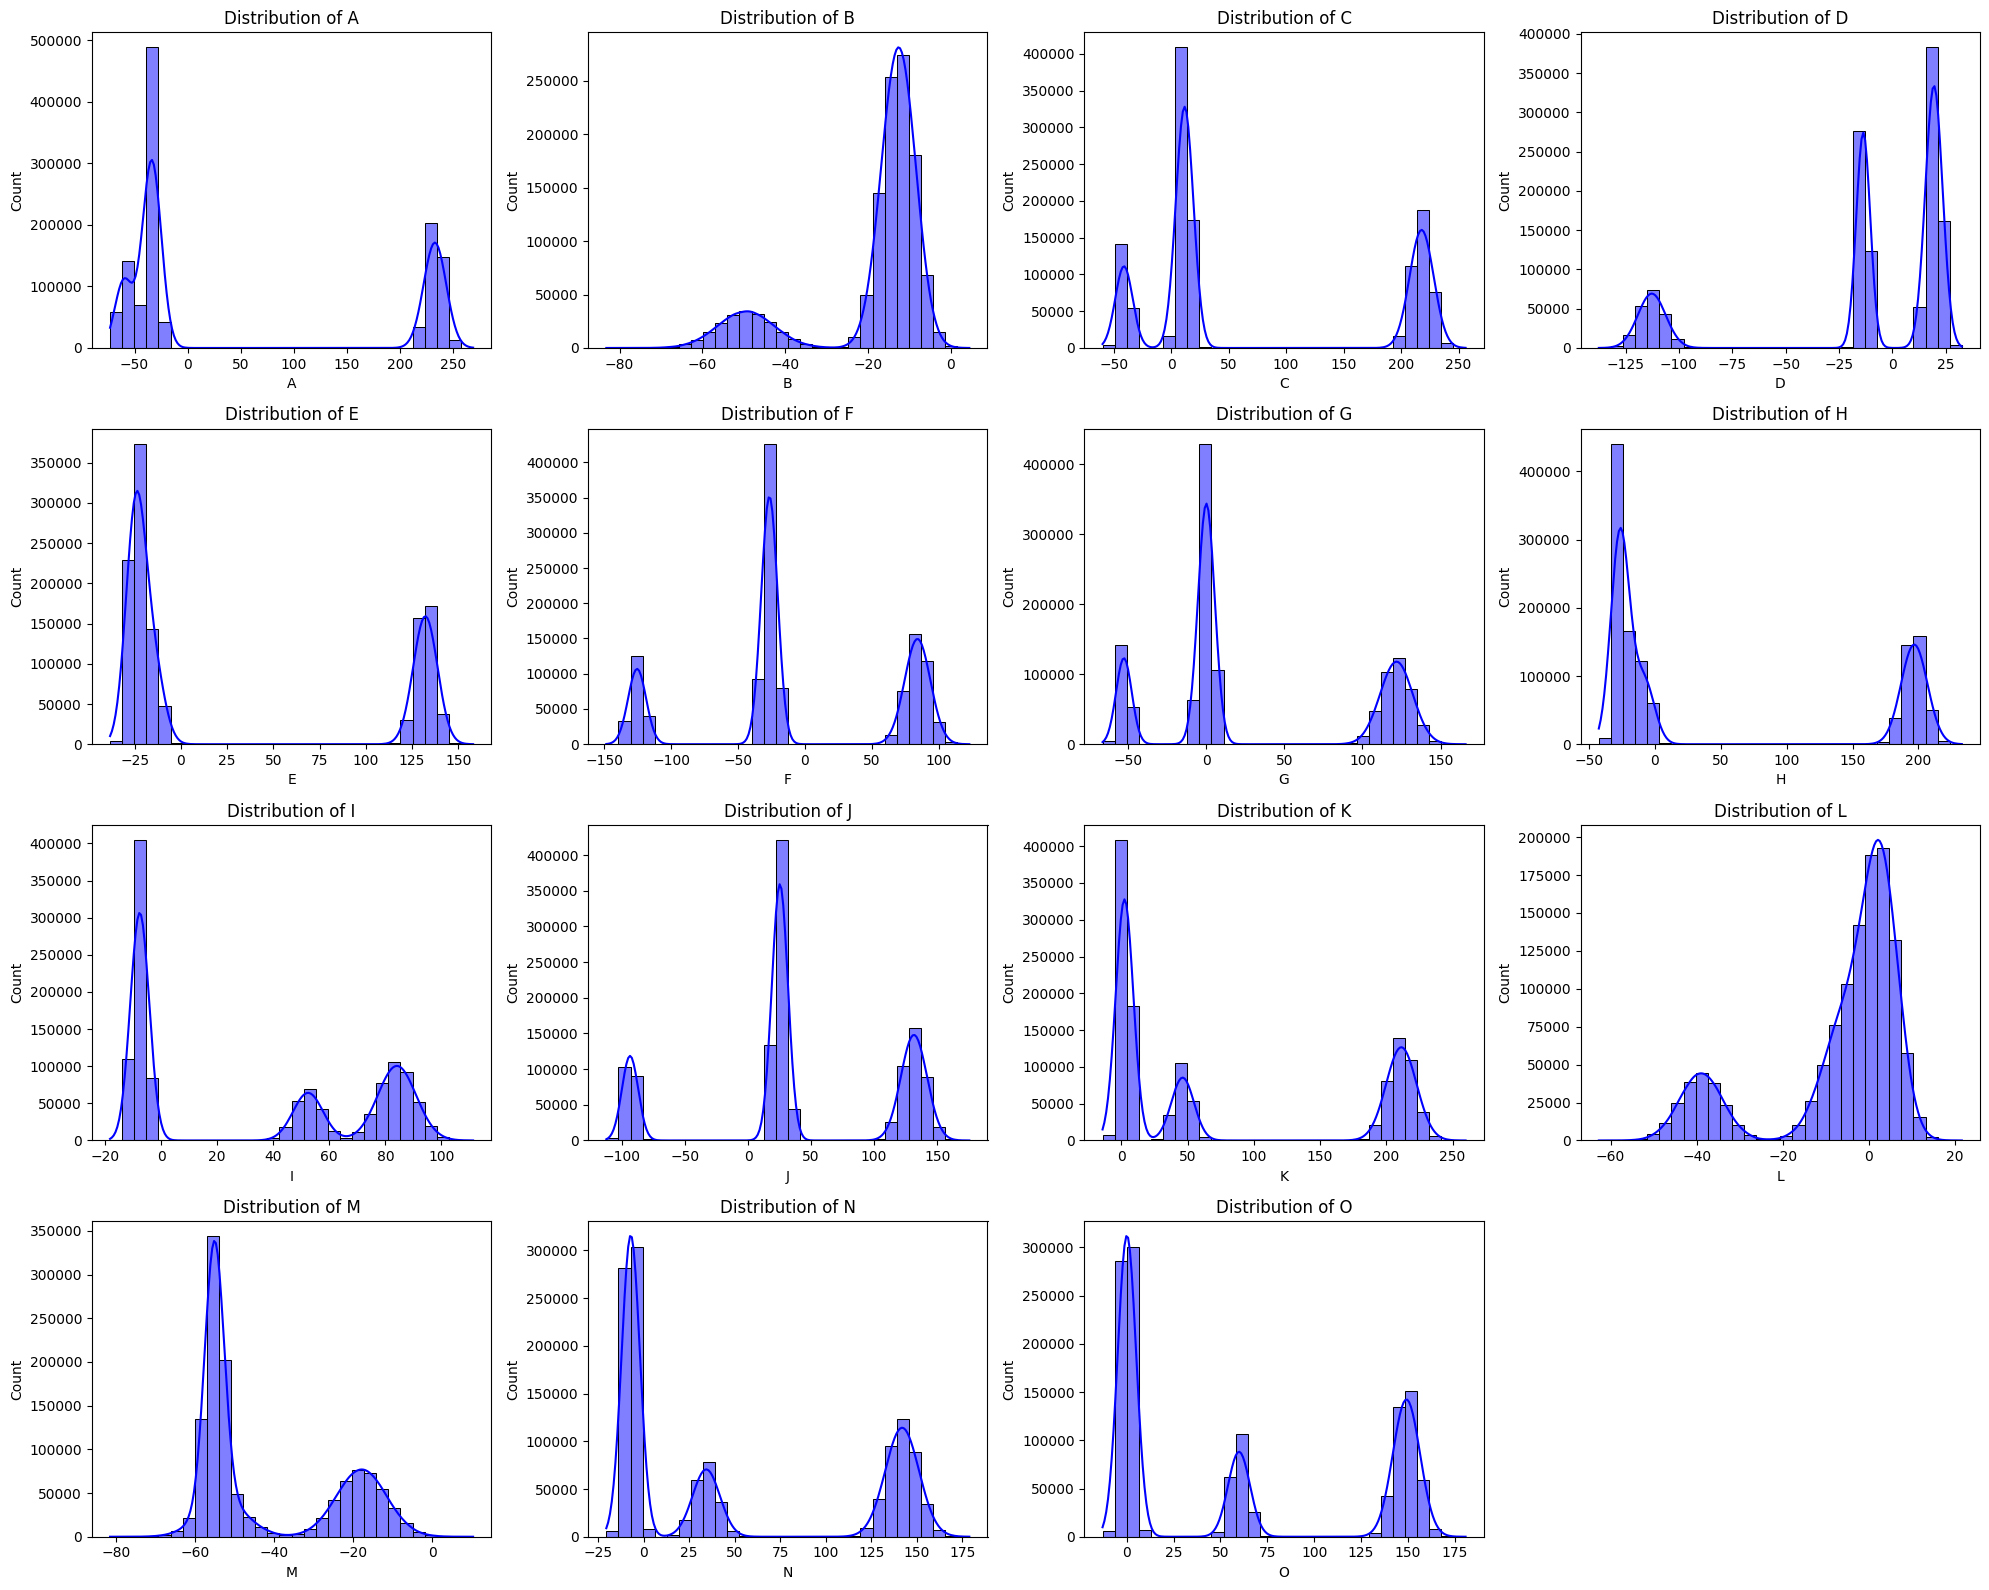

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Replace 'sampled_data' with your actual dataset
# Assume 'sampled_data' is the dataset and exclude the target column 'Class' if it exists
X = data.drop(columns=['Class']) if 'Class' in data.columns else data

# Set up the figure
num_features = len(X.columns)
rows = (num_features // 4) + (1 if num_features % 4 != 0 else 0)  # Dynamically calculate rows for 4 columns per row
fig, axes = plt.subplots(rows, 4, figsize=(20, 4 * rows))

# Flatten axes for easier iteration if there are multiple rows
axes = axes.flatten()

# Loop through each feature and plot its distribution
for i, column in enumerate(X.columns):
    sns.histplot(X[column], kde=True, ax=axes[i], bins=30, color="blue")
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')

# Remove empty subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


The analysis of the dataset's feature distributions indicates that E, F, and J exhibit a unimodal distribution, characterized by a single peak, making them straightforward to interpret. Conversely, features such as A, C, G, H, I, K, M, N, and O demonstrate multimodal distributions, suggesting the presence of underlying subgroups or clusters. Additionally, features B, D, and L display skewness.

Class Distribution:
 Class
3    569521
2    449885
1    180594
Name: count, dtype: int64


C:\Users\theep\AppData\Local\Temp\ipykernel_41100\1262929726.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['Class'], palette='viridis')


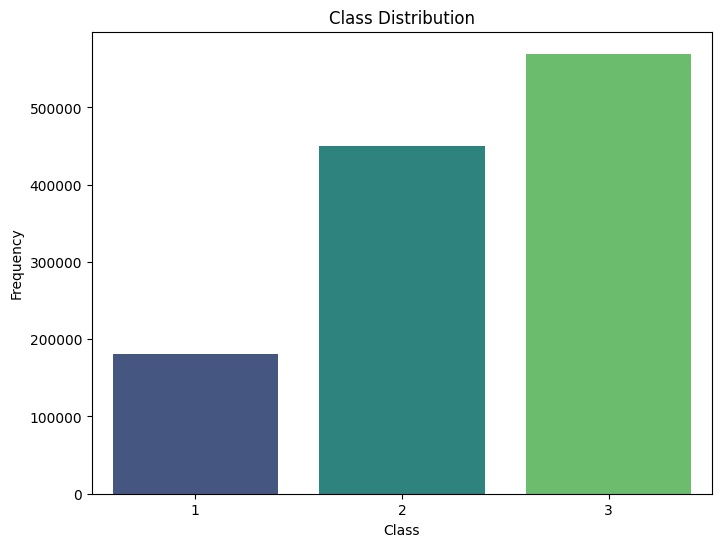

In [ ]:
# Print class distribution values
class_counts = data['Class'].value_counts()
print("Class Distribution:\n", class_counts)

# Plot class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x=data['Class'], palette='viridis')
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

The bar chart shows class imbalance in the dataset, with Class 3 being the most frequent, followed by Class 2, and Class 1 being the least. 

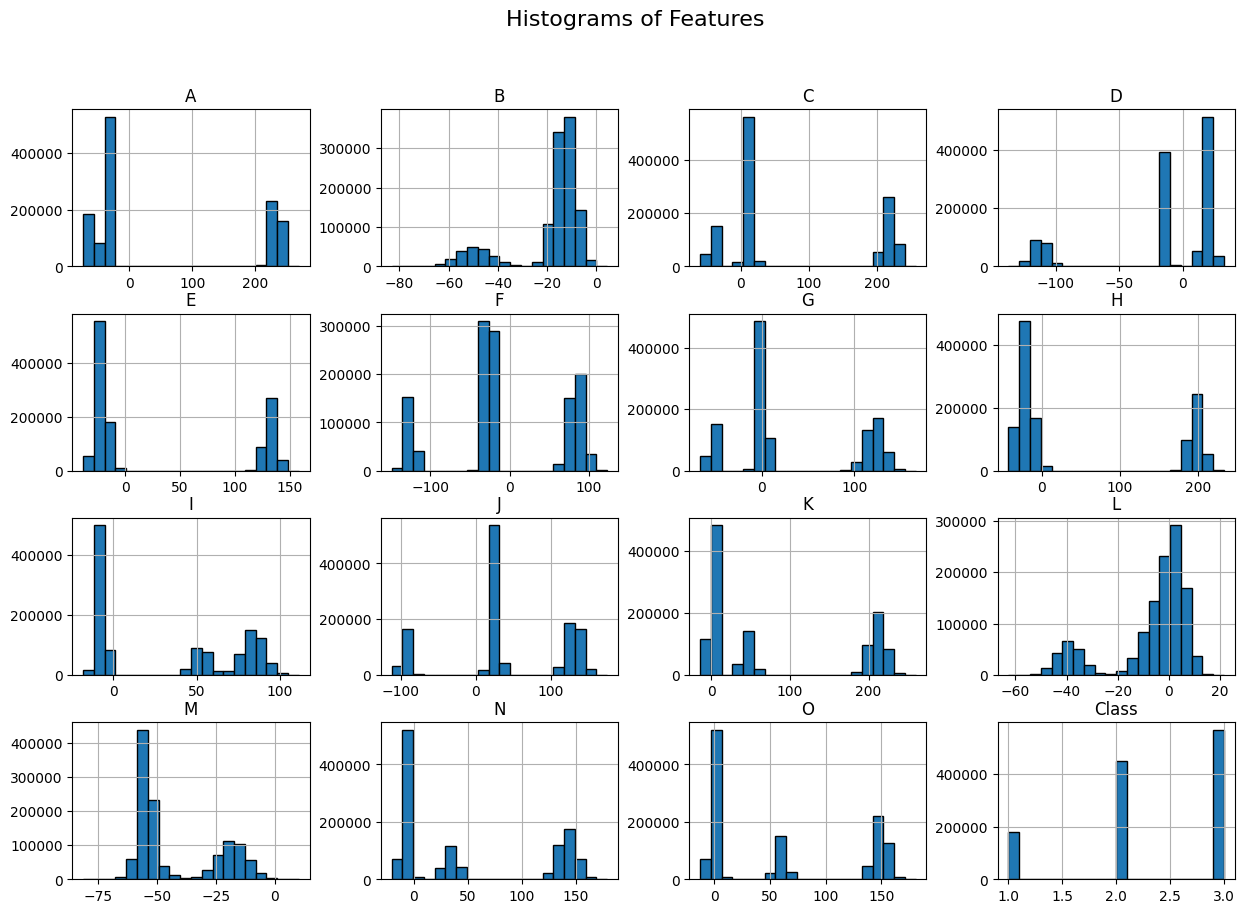

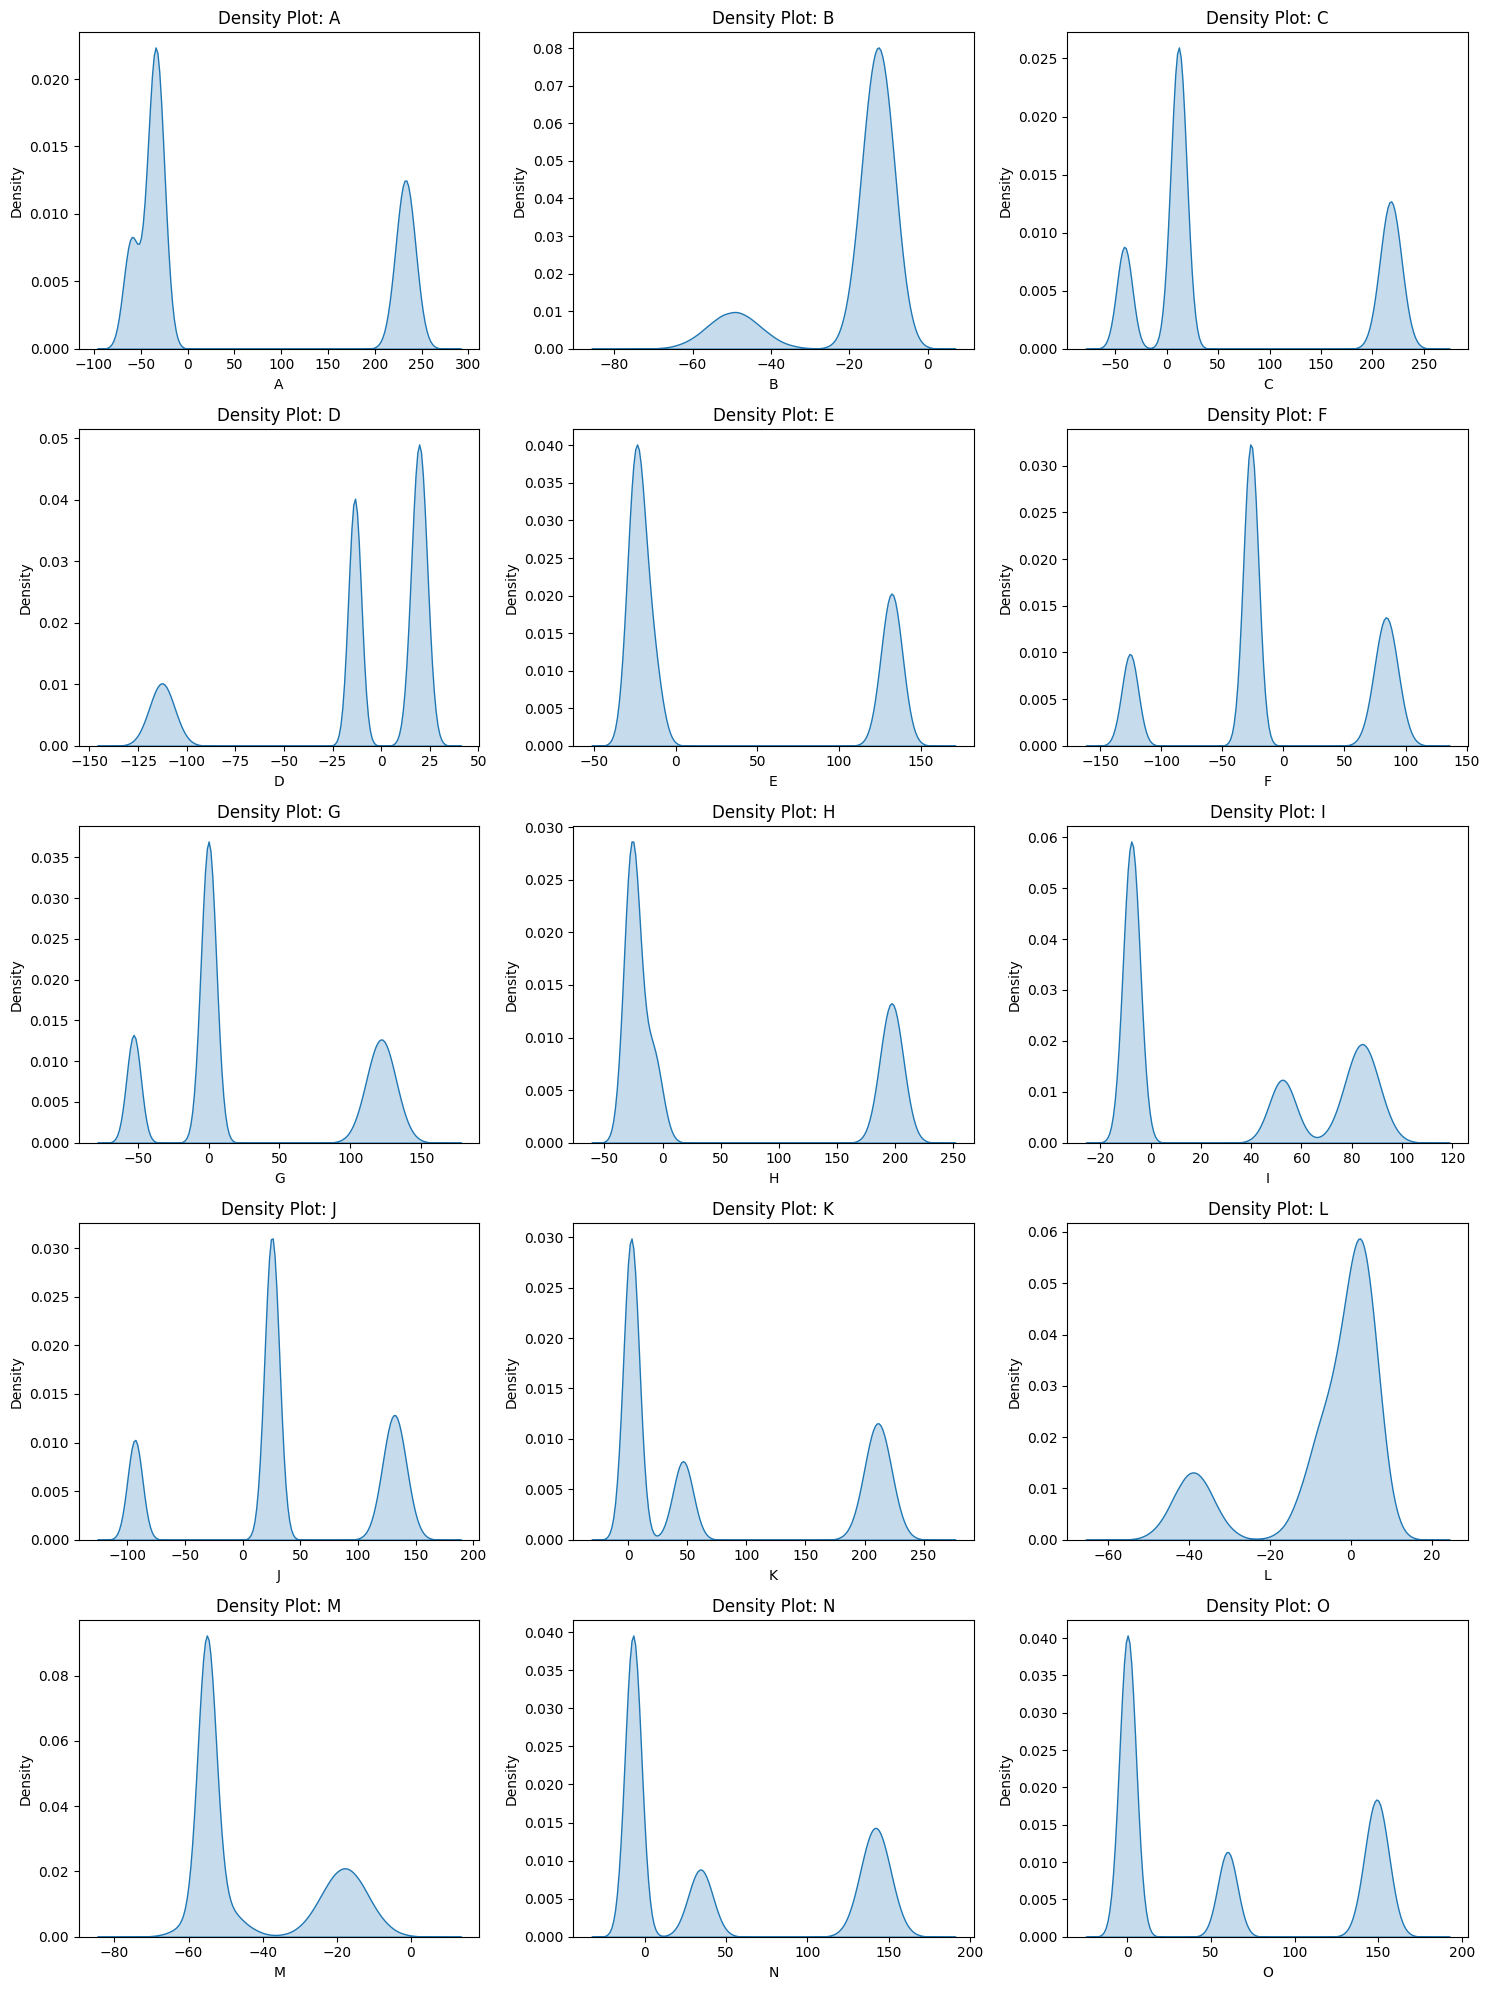

C:\Users\theep\AppData\Local\Temp\ipykernel_41100\683429190.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


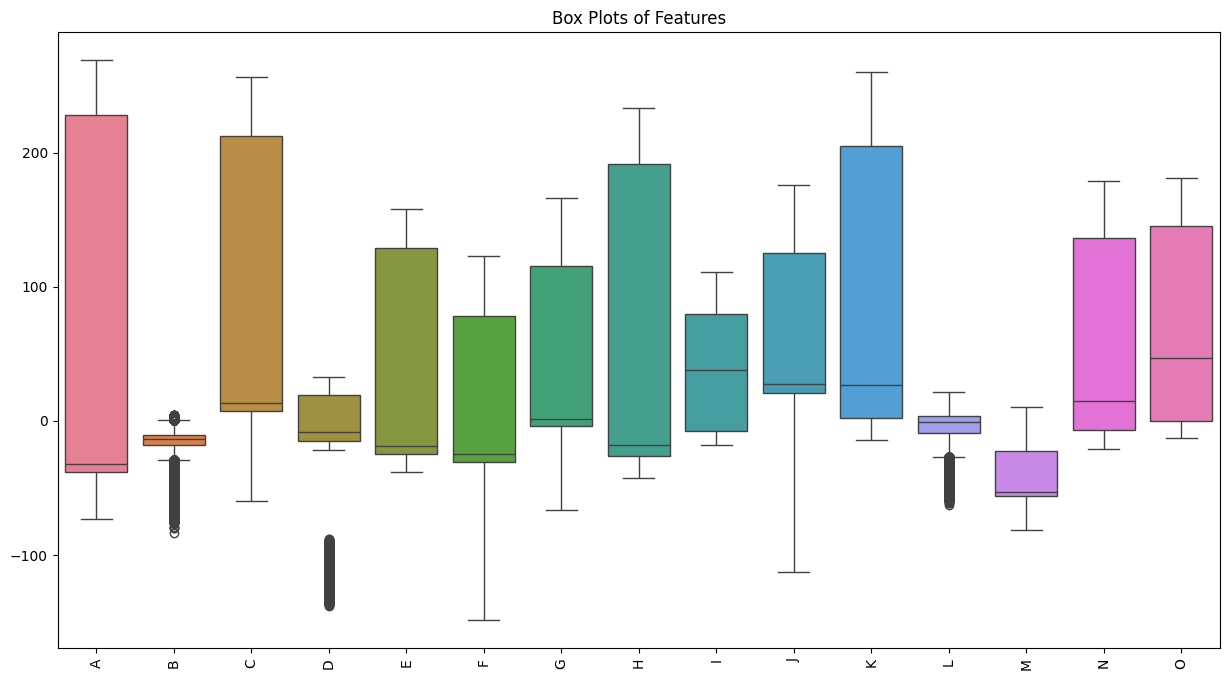

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Histogram for all features
data.hist(figsize=(15, 10), bins=20, edgecolor='black')
plt.suptitle('Histograms of Features', fontsize=16)
plt.show()



# Grid layout for Density Plots
num_features = len(data.columns[:-1])  # Exclude the target column
cols = 3  # Number of columns in the grid
rows = math.ceil(num_features / cols)

fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten()

# Plot density plots
for i, col in enumerate(data.columns[:-1]):  # Exclude the target column
    sns.kdeplot(data[col], fill=True, ax=axes[i])
    axes[i].set_title(f'Density Plot: {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')

# Hide unused subplots
for i in range(num_features, len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

# Grid layout for Box Plots
fig, ax = plt.subplots(figsize=(15, 8))
sns.boxplot(data=data.iloc[:, :-1], ax=ax)  # Exclude the target column
ax.set_title('Box Plots of Features')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()


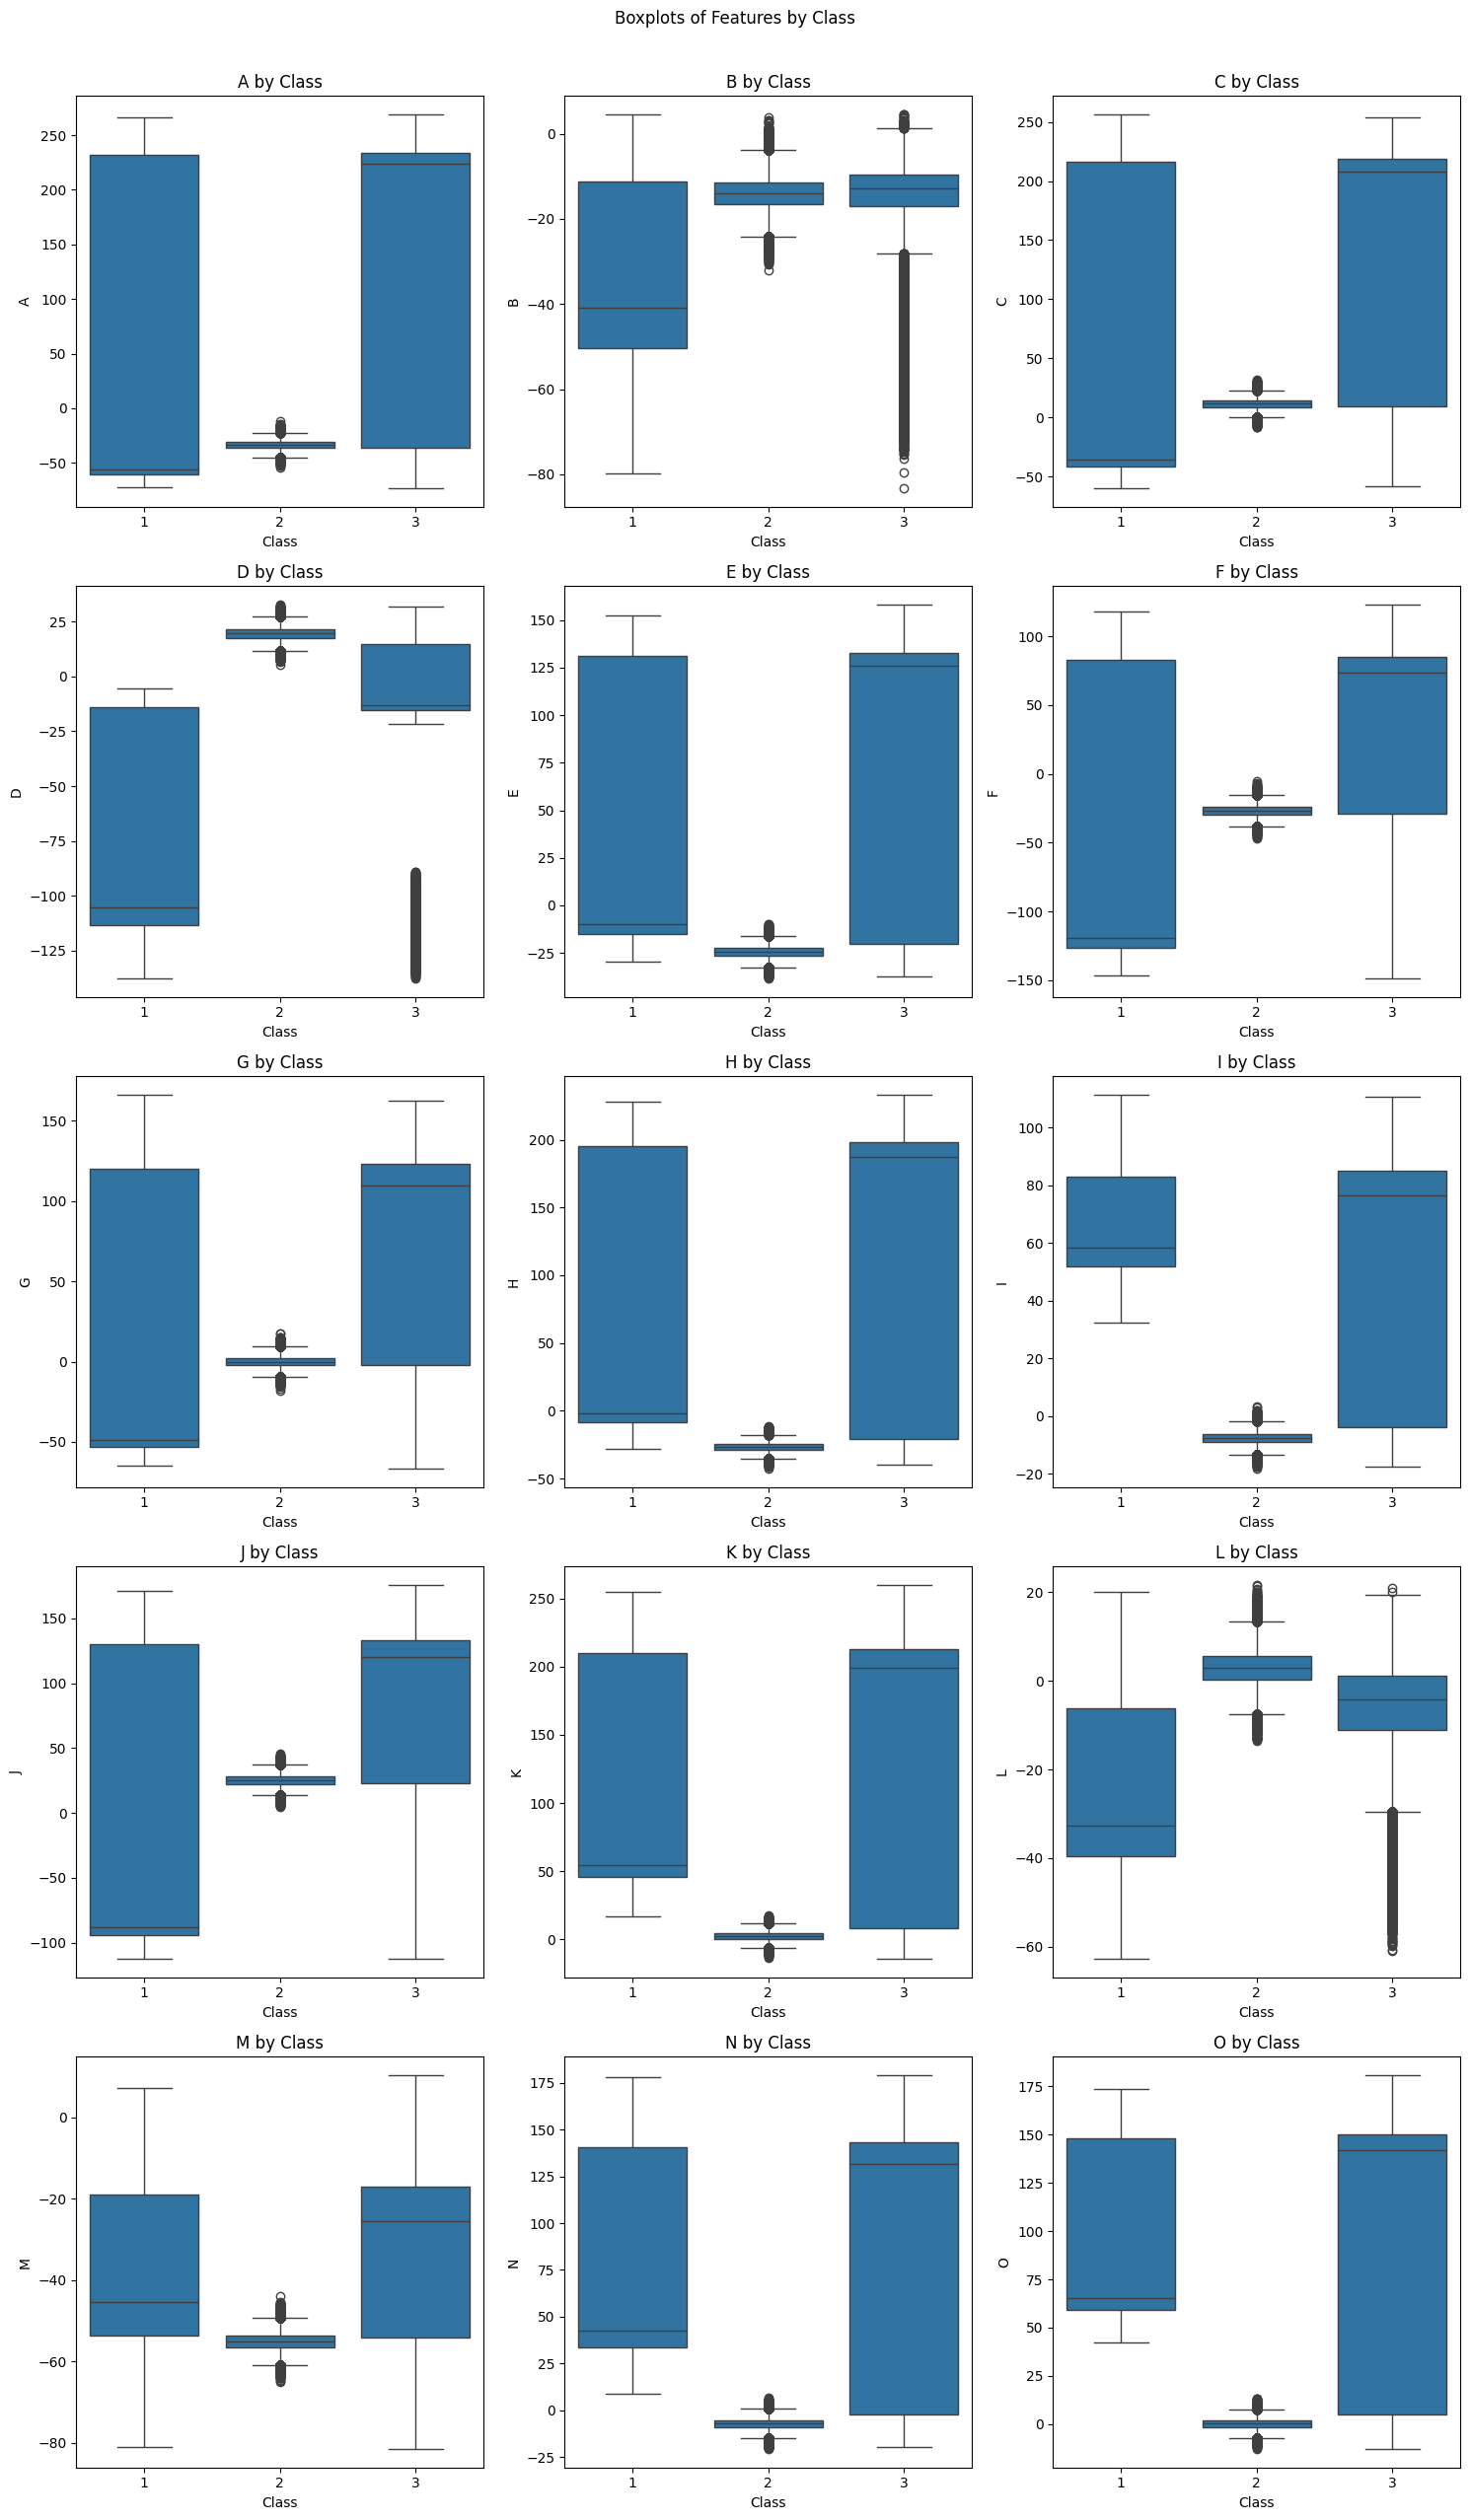

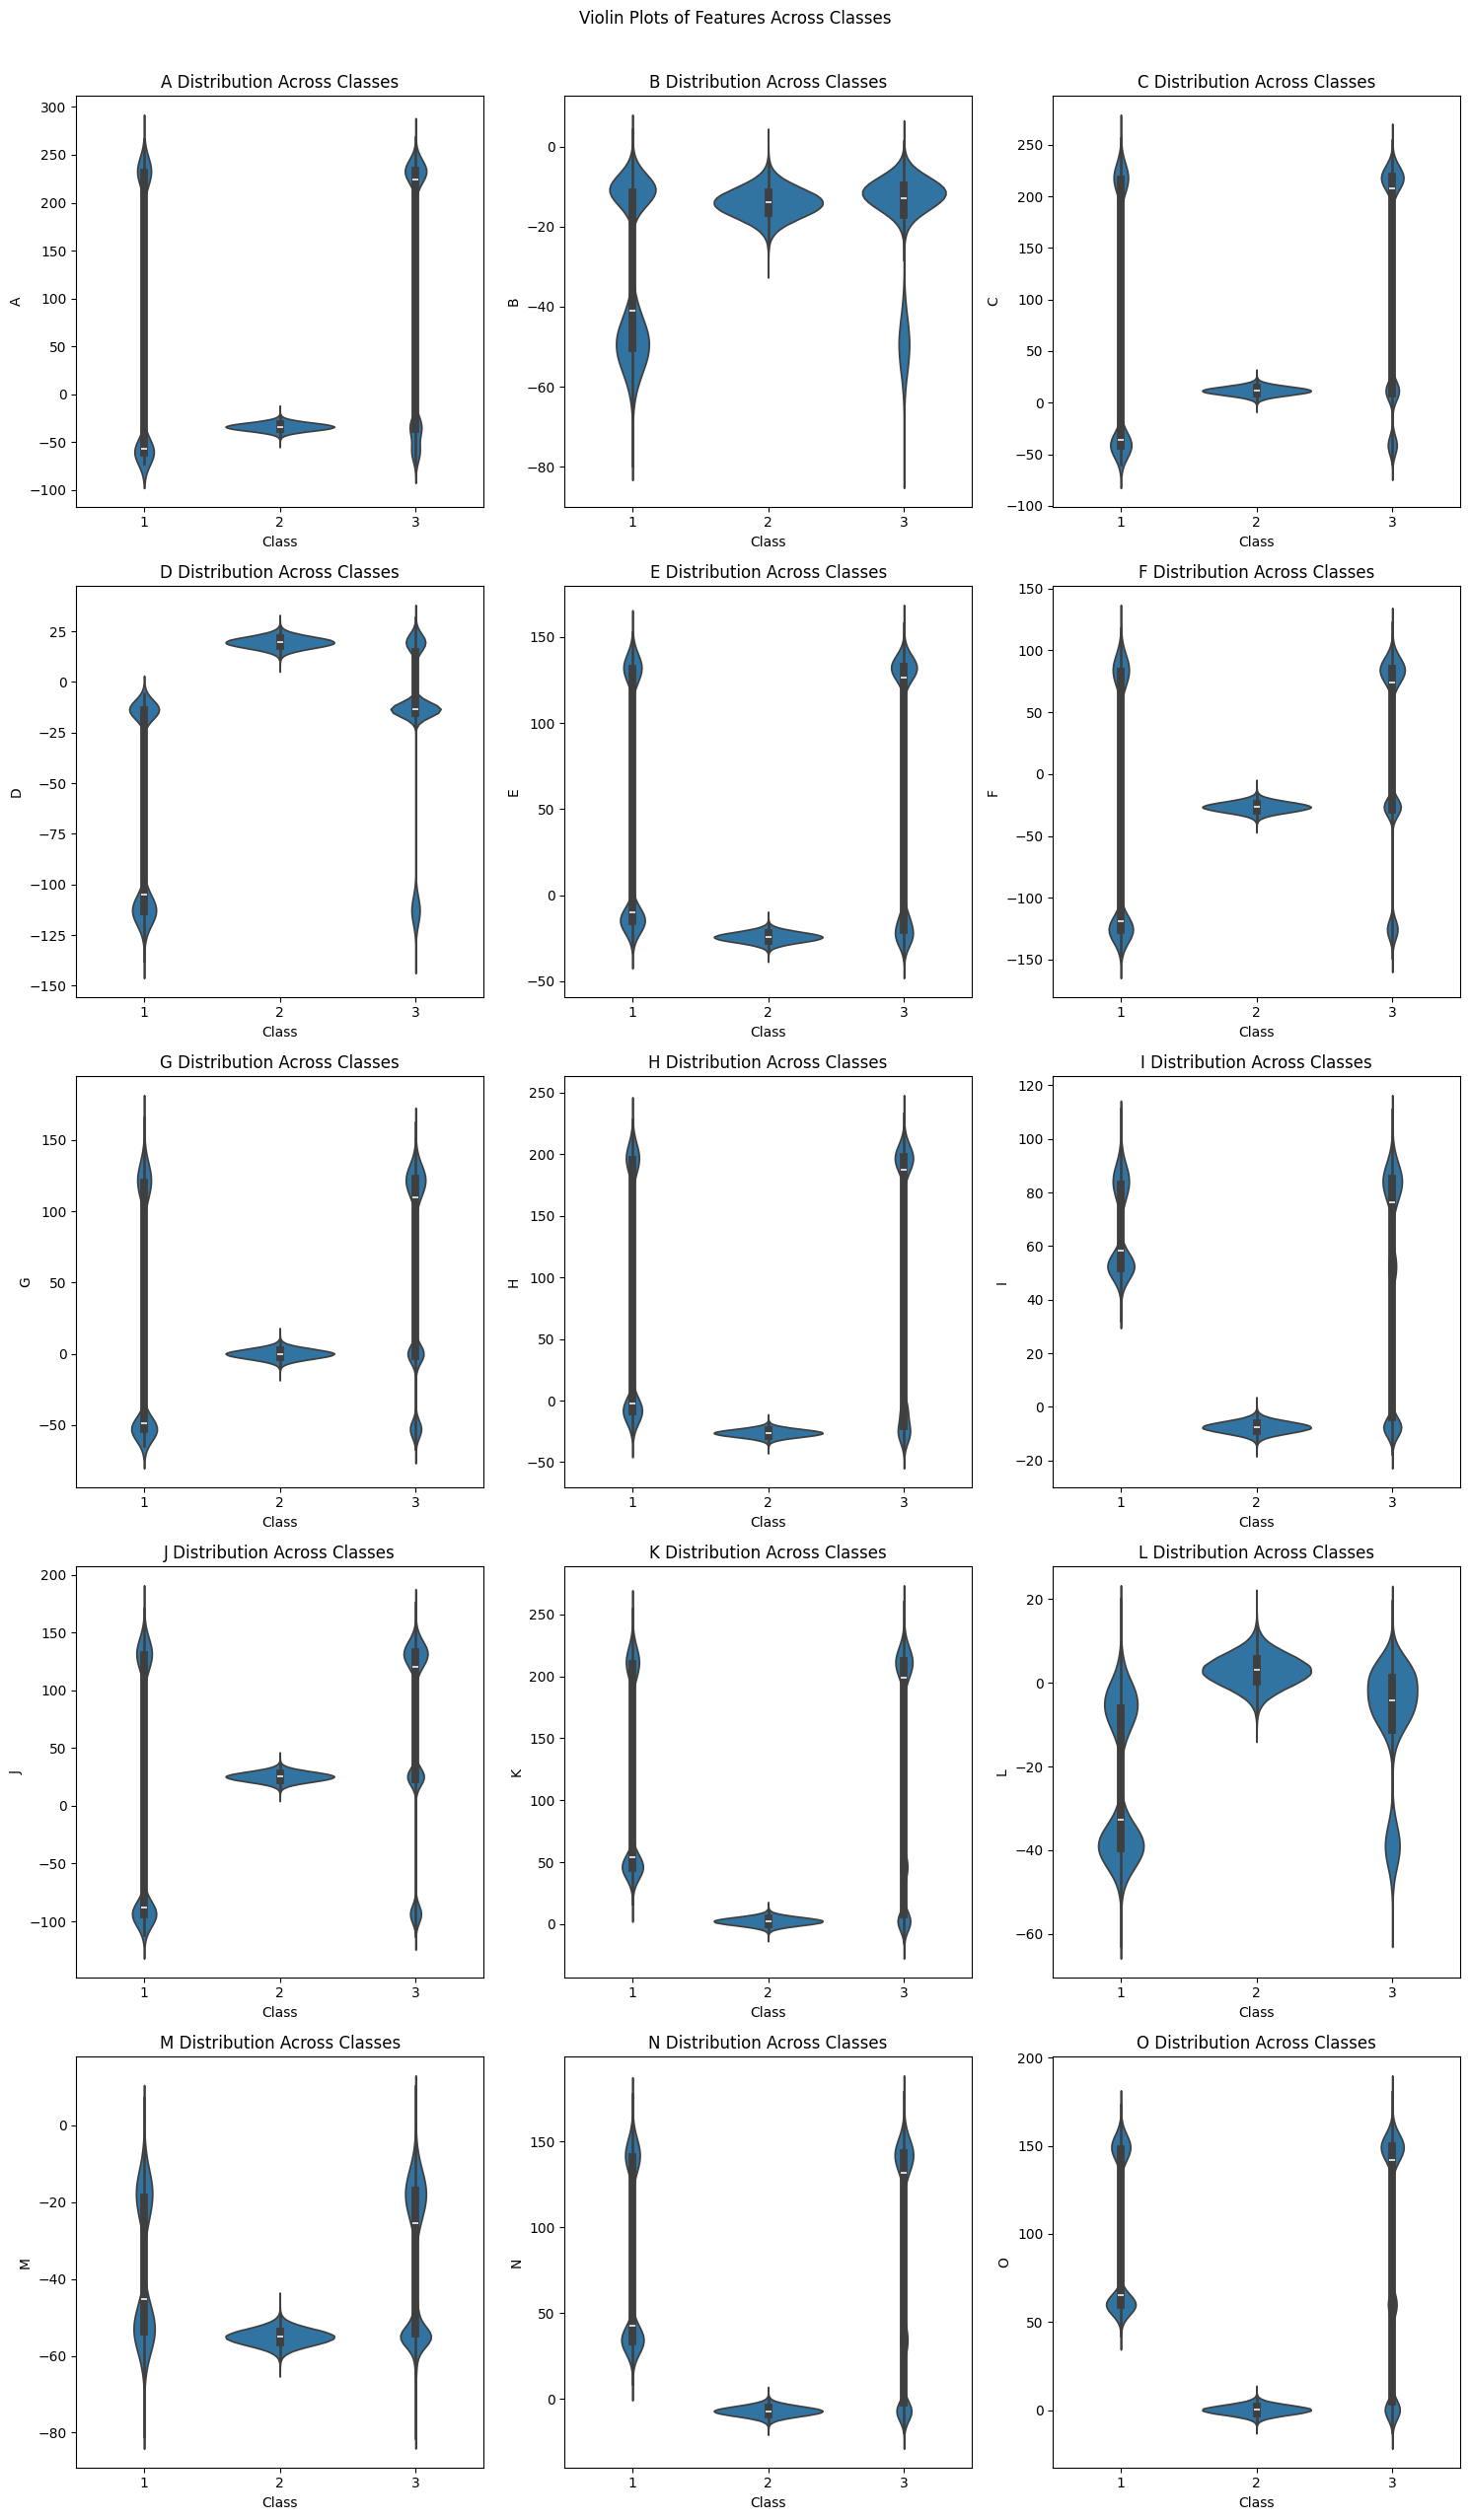

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Set number of rows and columns for subplots
num_features = len(data.columns[:-1])  # Exclude target column
n_cols = 3  # Number of columns per row
n_rows = math.ceil(num_features / n_cols)  # Calculate rows needed

# Create a single figure for boxplots
plt.figure(figsize=(15, 5 * n_rows))
for idx, col in enumerate(data.columns[:-1]):
    plt.subplot(n_rows, n_cols, idx + 1)
    sns.boxplot(x='Class', y=col, data=data)
    plt.title(f'{col} by Class')
plt.tight_layout()
plt.suptitle("Boxplots of Features by Class", y=1.02)
plt.show()

# Create a single figure for violin plots
plt.figure(figsize=(15, 5 * n_rows))
for idx, col in enumerate(data.columns[:-1]):
    plt.subplot(n_rows, n_cols, idx + 1)
    sns.violinplot(x='Class', y=col, data=data)
    plt.title(f'{col} Distribution Across Classes')
plt.tight_layout()
plt.suptitle("Violin Plots of Features Across Classes", y=1.02)
plt.show()


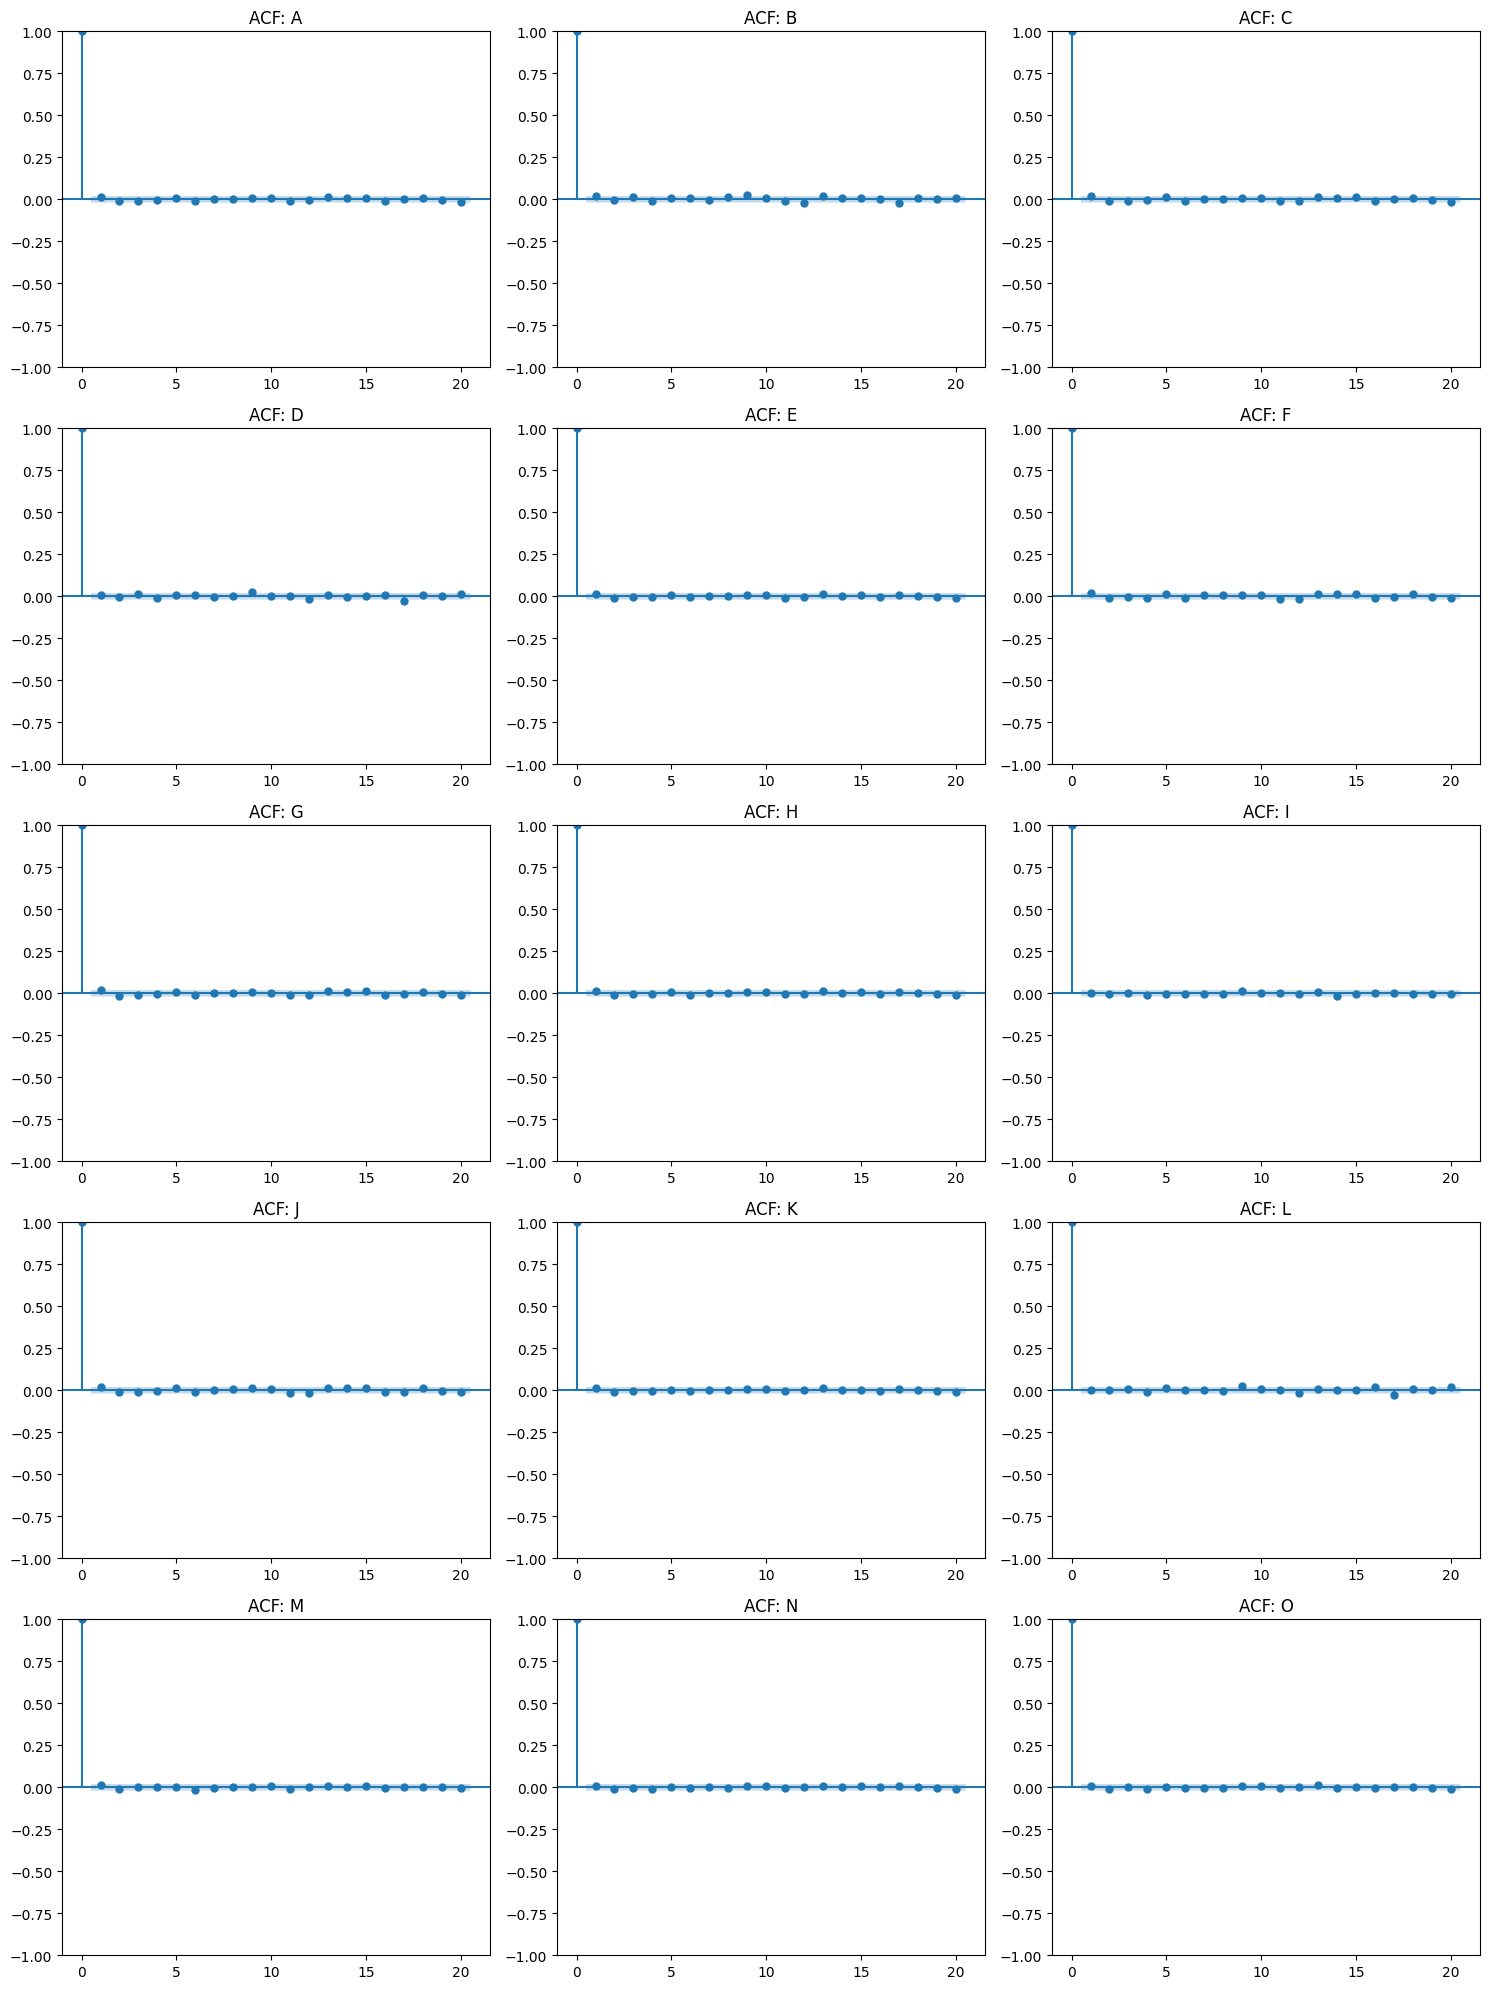

Durbin-Watson statistic: 2.009574680816575
No significant autocorrelation detected.


In [ ]:
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.stattools import durbin_watson
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Sample a subset of data if it's large
sampled_data = data.sample(10000, random_state=42) if len(data) > 10000 else data

# List of features for autocorrelation analysis
features = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O']

# Plot ACF for all features
num_features = len(features)
num_cols = 3  # Number of columns for subplots
num_rows = (num_features + num_cols - 1) // num_cols  # Calculate rows for subplot grid

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 4))
axes = axes.flatten()

for i, feature in enumerate(features):
    plot_acf(sampled_data[feature], lags=20, ax=axes[i])
    axes[i].set_title(f'ACF: {feature}')

# Remove unused subplots if any
for i in range(len(features), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

# Durbin-Watson Test for residual autocorrelation in regression
X = sampled_data[features]  # Independent variables
y = sampled_data['Class']  # Dependent variable

# Fit a regression model
X = sm.add_constant(X)  # Add constant for intercept
model = sm.OLS(y, X).fit()
residuals = model.resid

# Calculate the Durbin-Watson statistic
dw_stat = durbin_watson(residuals)
print(f'Durbin-Watson statistic: {dw_stat}')

# Interpretation of Durbin-Watson statistic
if 1.5 < dw_stat < 2.5:
    print("No significant autocorrelation detected.")
else:
    print("Potential autocorrelation detected.")


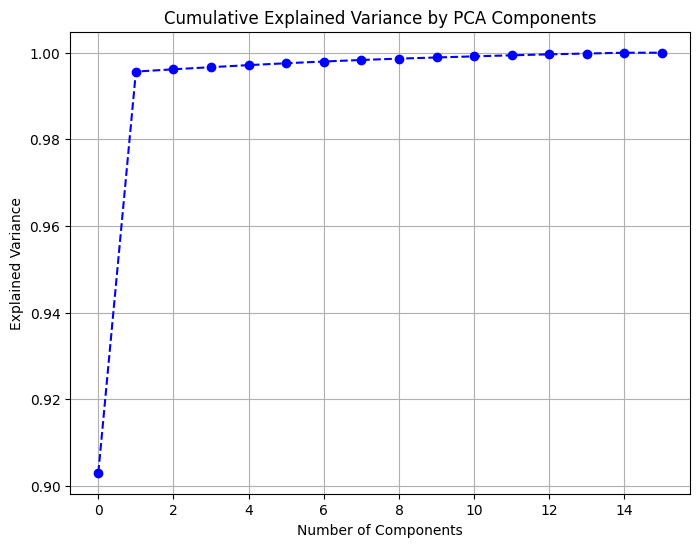

In [ ]:
from sklearn.decomposition import PCA

pca = PCA().fit(X)
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--', color='blue')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.grid()
plt.show()


The optimal number of principal components for analysis is likely 3 or 4 without losing much information, making it computationally efficient while retaining most of the data's characteristics. 

Features like A, C, E, and G show distinct medians and ranges for each class, indicating their importance for classification. However, features such as B, D, and L have overlapping distributions and notable outliers, which may affect their predictive value. 

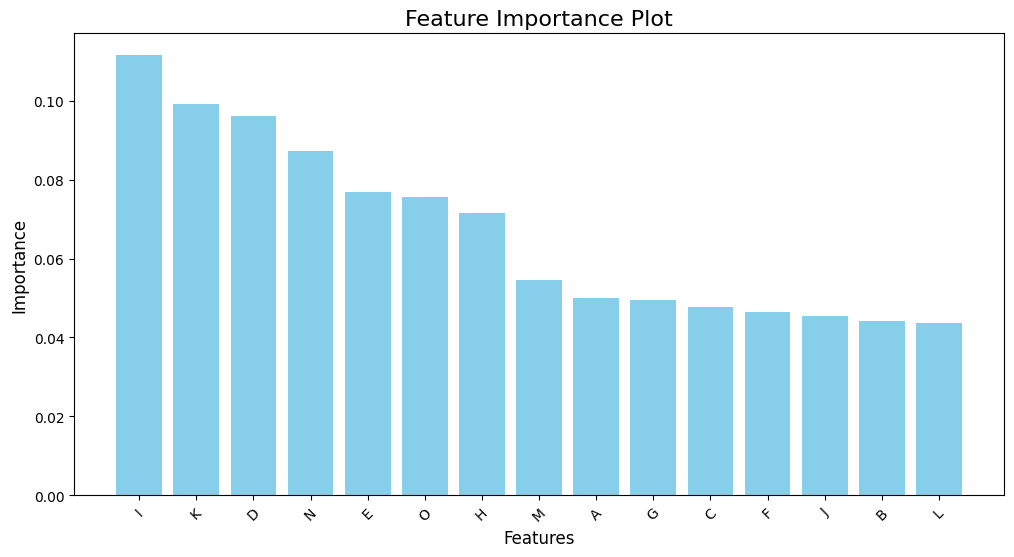

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import pandas as pd

# Assuming `sampled_data` contains your dataset
# Separate features and target
X = sampled_data.drop(columns=['Class'])
y = sampled_data['Class']

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X, y)

# Get feature importances
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 6))
plt.bar(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.xlabel('Features', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.title('Feature Importance Plot', fontsize=16)
plt.xticks(rotation=45, fontsize=10)
plt.show()


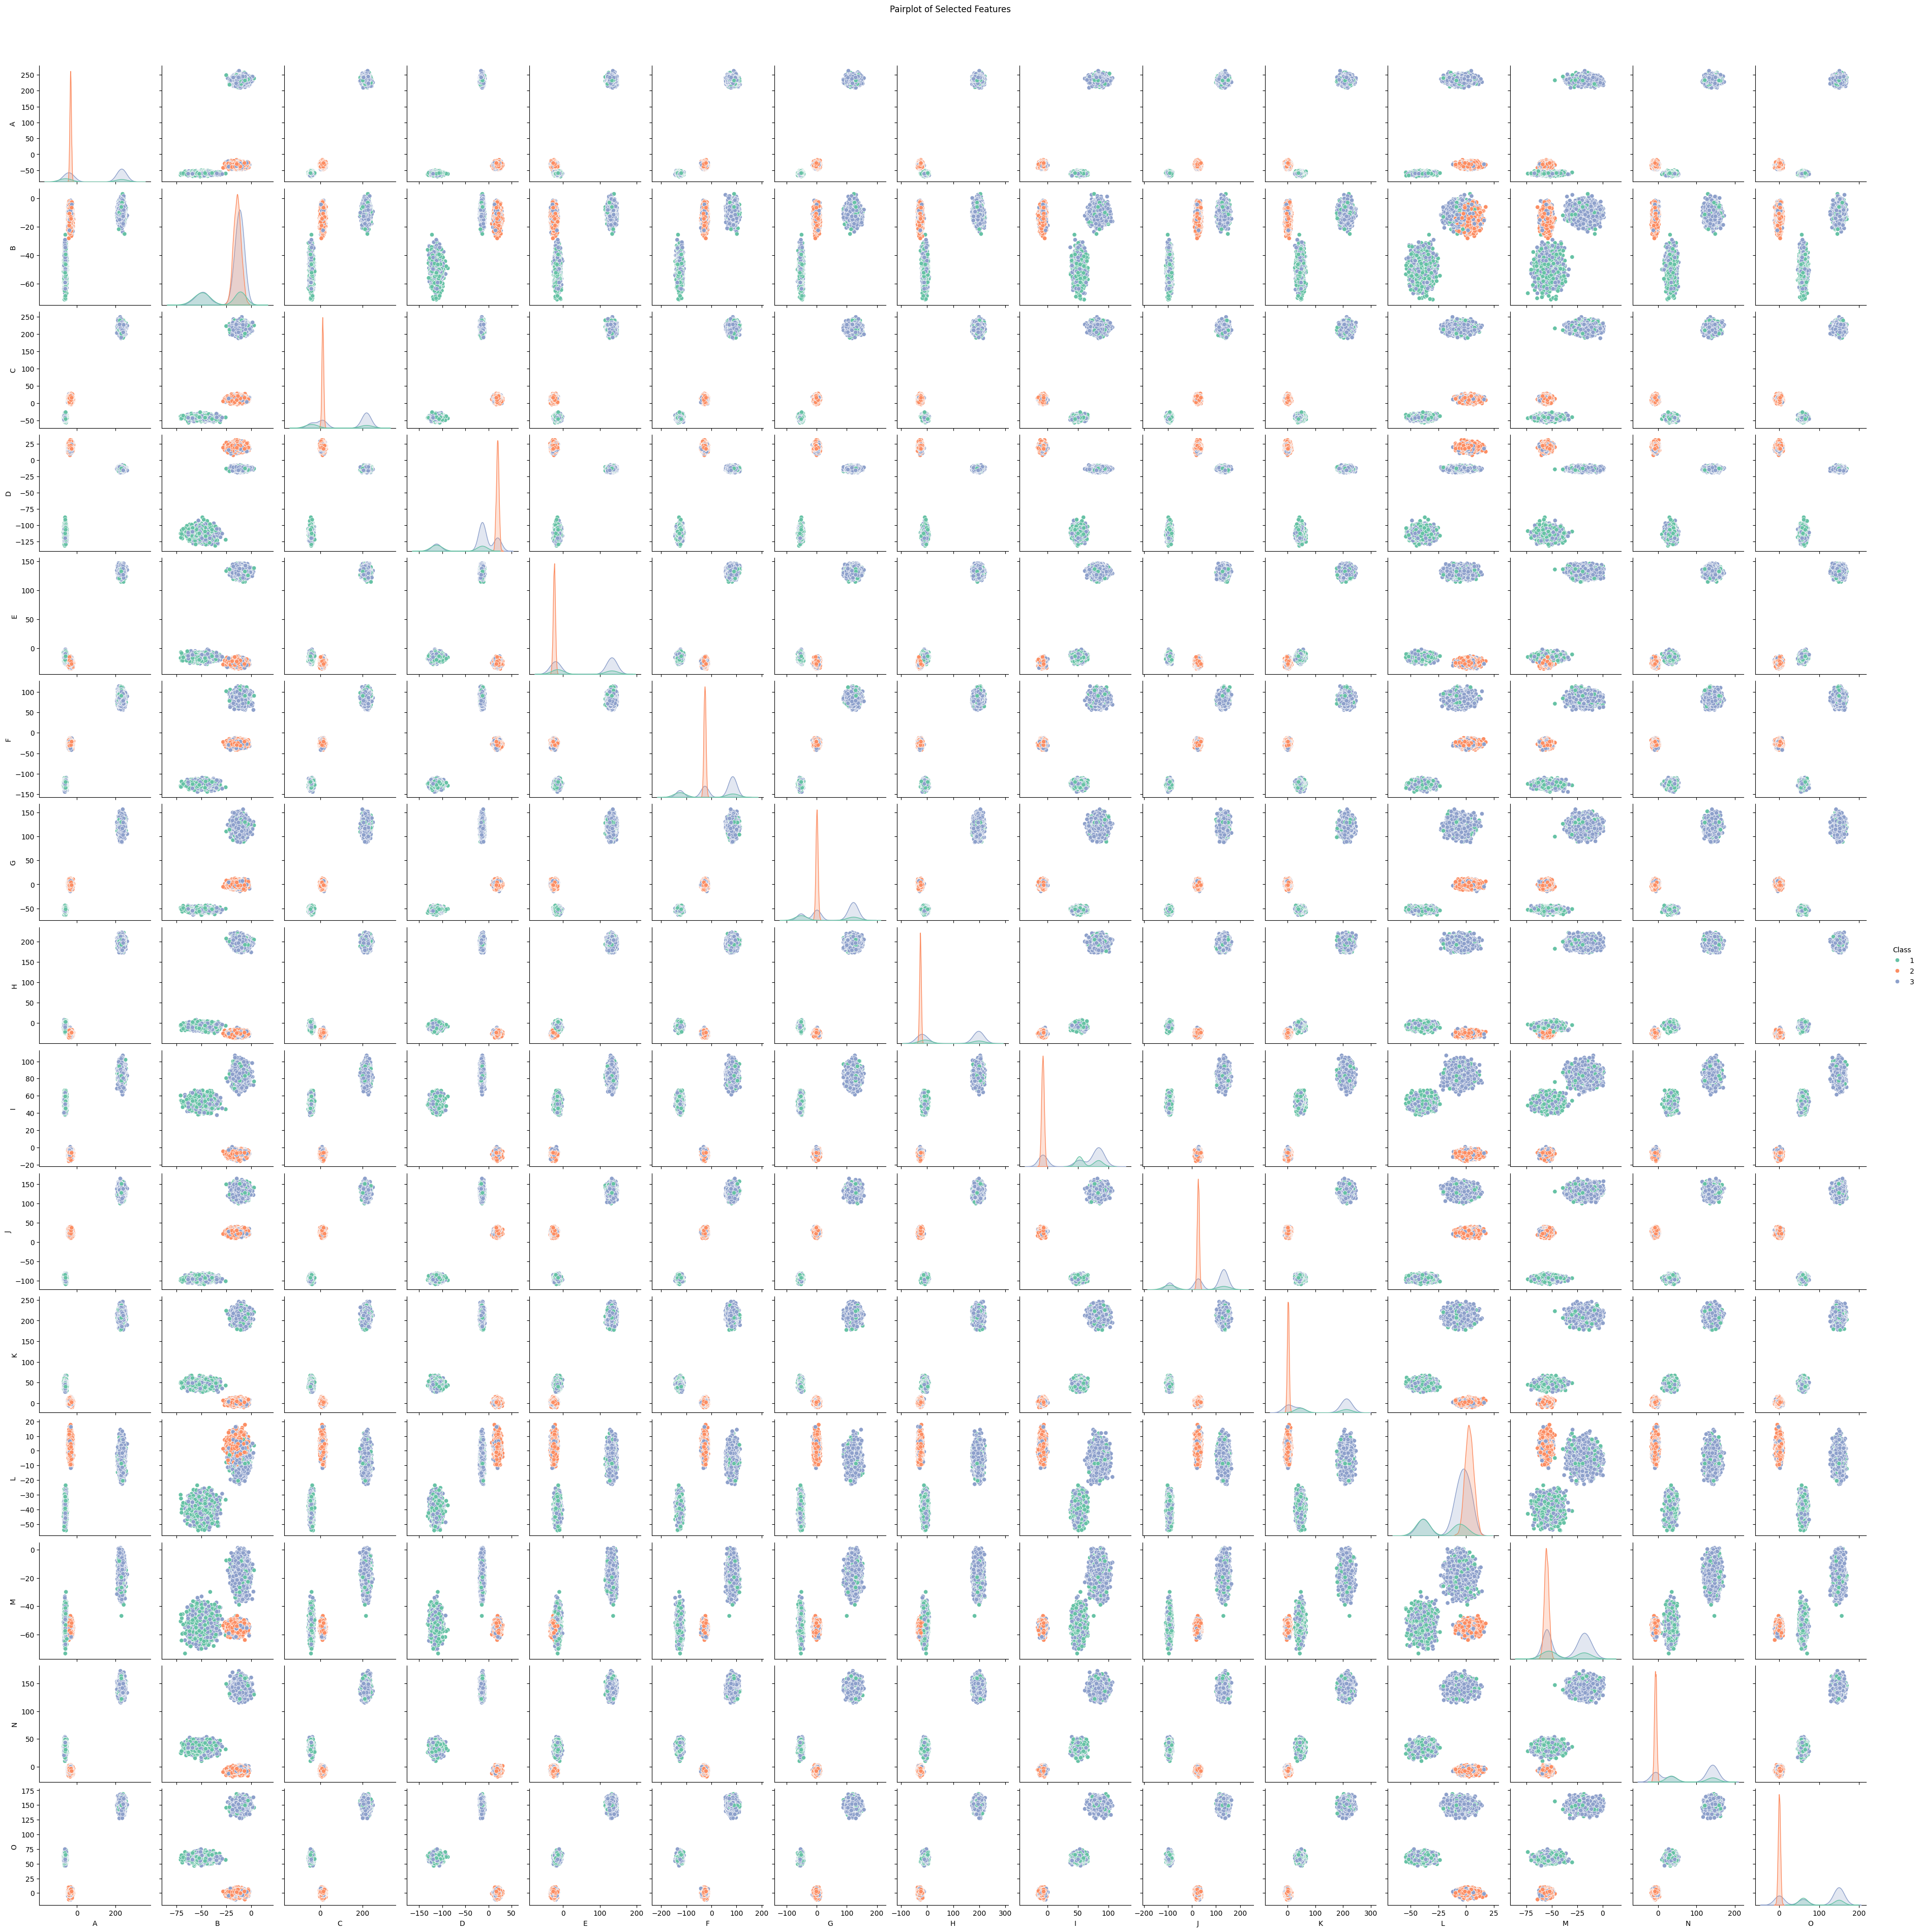

In [40]:
# Pairplot for relationships between selected features
# Useful for understanding relationships between features and how they differ across classes
sns.pairplot(sampled_data[['A', 'B', 'C', 'D','E','F','G','H','I','J','K','L','M','N','O','Class']], hue='Class', palette='Set2', diag_kind='kde')
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()

Series([], dtype: int64)


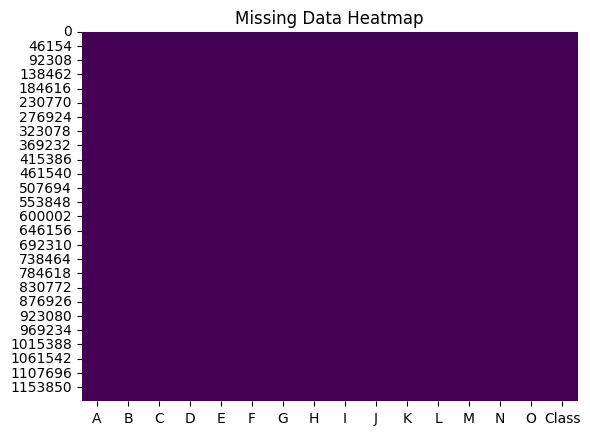

In [7]:
# Missing value count
missing_counts = data.isnull().sum()
print(missing_counts[missing_counts > 0])  # Show features with missing values

# Visualize missing data
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

In [18]:
import pandas as pd

# Assuming your data is in a DataFrame called df
# Replace 'B', 'D', 'L' with the actual column names if they are different
columns_to_check = ['B', 'D', 'L']

# Function to calculate the number of outliers using IQR
def calculate_outliers(sampled_datadata, feature):
    Q1 = data[feature].quantile(0.25)  # 25th percentile (Q1)
    Q3 = data[feature].quantile(0.75)  # 75th percentile (Q3)
    IQR = Q3 - Q1                      # Interquartile range

    lower_bound = Q1 - 1.5 * IQR       # Lower bound
    upper_bound = Q3 + 1.5 * IQR       # Upper bound

    outliers = sampled_datadata[(data[feature] < lower_bound) | (sampled_datadata[feature] > upper_bound)]
    return len(outliers)

# Calculate and print the number of outliers for each column
outlier_counts = {}
for col in columns_to_check:
    outlier_counts[col] = calculate_outliers(data, col)
    print(f"Number of outliers in {col}: {outlier_counts[col]}")

# If you want to save the results as a dictionary or a DataFrame:
outlier_summary = pd.DataFrame(outlier_counts.items(), columns=['Feature', 'Outlier_Count'])
print(outlier_summary)

Number of outliers in B: 200297
Number of outliers in D: 200103
Number of outliers in L: 198365
  Feature  Outlier_Count
0       B         200297
1       D         200103
2       L         198365


THe outlier counts in features B, D, and L, with B having 200,297 outliers, D with 200,103, and L with 198,365.

In [ ]:
import pandas as pd

# Assuming `data` is your dataset
columns_with_outliers = ['B', 'D', 'L']  # Columns to reduce outliers

# Define a function to cap outliers based on IQR
def reduce_outliers(df, column):
    Q1 = df[column].quantile(0.25)  # First quartile (25th percentile)
    Q3 = df[column].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile range
    
    # Define lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Cap values outside the bounds
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

# Apply the outlier reduction function to each column
for col in columns_with_outliers:
    reduce_outliers(data, col)

# Verify the changes
print(data[columns_with_outliers].describe())

                  B             D             L
count  1.200000e+06  1.200000e+06  1.200000e+06
mean  -1.538722e+01 -5.778168e+00 -4.779612e+00
std    7.039593e+00  3.087996e+01  1.144640e+01
min   -2.883263e+01 -6.612051e+01 -2.718950e+01
25%   -1.786669e+01 -1.471337e+01 -8.875128e+00
50%   -1.369876e+01 -8.004308e+00 -1.079123e+00
75%   -1.055606e+01  1.955806e+01  3.334451e+00
max    4.098900e-01  3.263799e+01  2.159496e+01


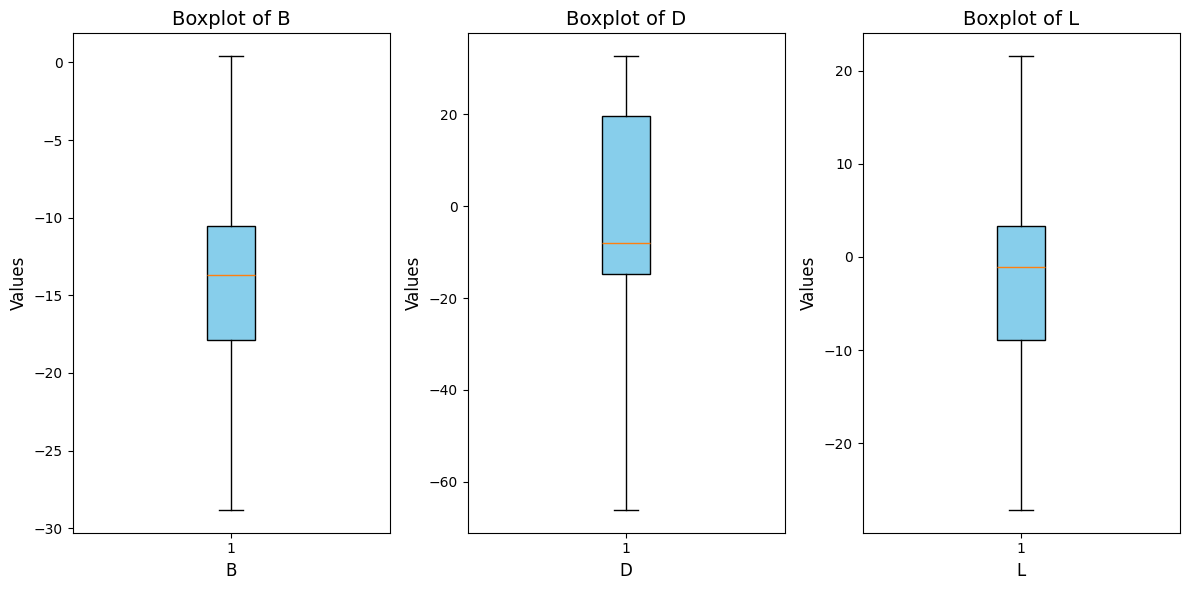

In [20]:
import matplotlib.pyplot as plt

# Columns to check
columns_with_outliers = ['B', 'D', 'L']

# Create boxplots for the specified columns
plt.figure(figsize=(12, 6))
for i, col in enumerate(columns_with_outliers, 1):
    plt.subplot(1, 3, i)  # Create a subplot for each variable
    plt.boxplot(data[col], patch_artist=True, boxprops=dict(facecolor="skyblue"))
    plt.title(f'Boxplot of {col}', fontsize=14)
    plt.ylabel('Values', fontsize=12)
    plt.xlabel(col, fontsize=12)

# Adjust layout for better display
plt.tight_layout()
plt.show()

In [5]:
import numpy as np
import pandas as pd

# Assuming `data` is your dataset
columns_with_skewness = ['B', 'D', 'L']  # Columns with high skewness

# Define a function to reduce skewness
def reduce_skewness(df, column):
    if (df[column] <= 0).any():  # If there are non-positive values
        # Apply square root transformation to non-positive values
        df[column] = np.sign(df[column]) * np.sqrt(np.abs(df[column]))
    else:
        # Apply log transformation to positive values
        df[column] = np.log1p(df[column])  # log1p handles log(1 + x)

# Apply the skewness reduction function to each column
for col in columns_with_skewness:
    reduce_skewness(data, col)

# Check the skewness again
print("Skewness after transformation:")
print(data[columns_with_skewness].skew())


Skewness after transformation:
B   -1.256323
D   -0.515043
L   -0.420621
dtype: float64


In [6]:
import pandas as pd

# Assuming `data` is your dataset
# Calculate skewness for all numerical columns in the dataset
skewness = data.skew()

# Print skewness for each column
print("Skewness of the dataset:")
print(skewness)

# Optionally, you can save this to a DataFrame for easier viewing
skewness_summary = pd.DataFrame({
    'Feature': skewness.index,
    'Skewness': skewness.values
}).sort_values(by='Skewness', ascending=False)

# Display the skewness summary
print("\nSkewness Summary:")
print(skewness_summary)


Skewness of the dataset:
A        0.691133
B       -1.256323
C        0.603650
D       -0.515043
E        0.700554
F       -0.096942
G        0.450722
H        0.698332
I        0.191836
J       -0.335348
K        0.636824
L       -0.420621
M        0.748568
N        0.583845
O        0.451140
Class   -0.574870
dtype: float64

Skewness Summary:
   Feature  Skewness
12       M  0.748568
4        E  0.700554
7        H  0.698332
0        A  0.691133
10       K  0.636824
2        C  0.603650
13       N  0.583845
14       O  0.451140
6        G  0.450722
8        I  0.191836
5        F -0.096942
9        J -0.335348
11       L -0.420621
3        D -0.515043
15   Class -0.574870
1        B -1.256323


In [7]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType
import onnxruntime as rt

Performing feature selection with RFE...
Selected Features: Index(['D', 'E', 'F', 'I', 'J', 'K', 'N', 'O'], dtype='object')
Fitting RandomizedSearchCV...
Best Parameters:
{'classifier__n_estimators': 30, 'classifier__min_samples_split': 5, 'classifier__min_samples_leaf': 1, 'classifier__max_depth': 8}
Train Accuracy: 0.7257
Test Accuracy: 0.7241
              precision    recall  f1-score   support

           1       0.50      0.56      0.53     36189
           2       0.75      1.00      0.86     89845
           3       0.80      0.56      0.66    113966

    accuracy                           0.72    240000
   macro avg       0.68      0.71      0.68    240000
weighted avg       0.74      0.72      0.71    240000

Cross-validation scores: [0.7265625  0.72585312 0.72445625]
Mean CV Score: 0.7256
Standard Deviation of CV Scores: 0.0009
Confusion Matrix (Test Data):
[[20092     0 16097]
 [    0 89844     1]
 [19986 30139 63841]]


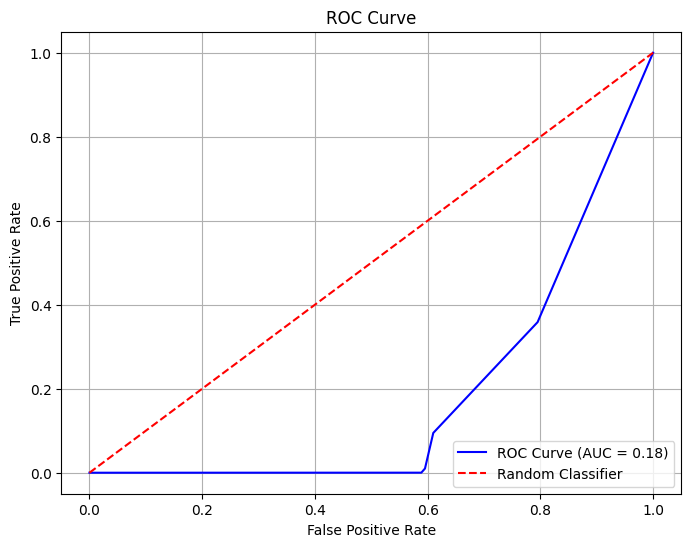

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Define features and target
X = data.drop(columns='Class')
y = data['Class']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Base model for RFE
base_model = RandomForestClassifier(
    n_estimators=30, 
    max_depth=10,     
    random_state=42,
    n_jobs=-1
)

# Define RFE
rfe = RFE(estimator=base_model, n_features_to_select=8, step=2)

# Perform feature selection with RFE
print("Performing feature selection with RFE...")
X_rfe, _, y_rfe, _ = train_test_split(X_train, y_train, test_size=0.9, random_state=42)
rfe.fit(X_rfe, y_rfe)

# Filter dataset to include only selected features
selected_features = X.columns[rfe.support_]
print(f"Selected Features: {selected_features}")

# Update train and test sets to only use selected features
X_train = X_train[selected_features]
X_test = X_test[selected_features]

# Define hyperparameter grid for Random Forest
param_dist = {
    'classifier__n_estimators': [10, 30, 50],
    'classifier__max_depth': [5, 8, 12],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 3, 5],
}

# Define preprocessing and model pipeline
pipeline = Pipeline([
    ('scaling', StandardScaler()),
    ('pca', PCA(n_components=5)),
    ('classifier', RandomForestClassifier(
        random_state=42,
        class_weight='balanced',
        n_jobs=-1
    ))
])

# Wrap pipeline with RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_dist,
    n_iter=5,
    scoring='accuracy',
    cv=3,
    random_state=42,
    n_jobs=-1,
    error_score='raise'  # Debugging enabled
)

# Fit RandomizedSearchCV on the training data
try:
    print("Fitting RandomizedSearchCV...")
    random_search.fit(X_train, y_train)
    print("Best Parameters:")
    print(random_search.best_params_)
except Exception as e:
    print("Error during RandomizedSearchCV:")
    print(e)

# Evaluate the best model on train data
y_train_pred = random_search.best_estimator_.predict(X_train)
train_accuracy = (y_train_pred == y_train).mean()
print(f"Train Accuracy: {train_accuracy:.4f}")

# Evaluate the best model on test data
y_test_pred = random_search.best_estimator_.predict(X_test)
test_accuracy = (y_test_pred == y_test).mean()
print(f"Test Accuracy: {test_accuracy:.4f}")
print(classification_report(y_test, y_test_pred))

# Perform cross-validation and print results
cv_scores = cross_val_score(
    random_search.best_estimator_,
    X_train,
    y_train,
    cv=3,
    scoring='accuracy'
)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV Score: {cv_scores.mean():.4f}")
print(f"Standard Deviation of CV Scores: {cv_scores.std():.4f}")

# Print confusion matrix
print("Confusion Matrix (Test Data):")
conf_matrix = confusion_matrix(y_test, y_test_pred)
print(conf_matrix)

# Generate ROC curve if probabilities are available
if hasattr(random_search.best_estimator_.named_steps['classifier'], 'predict_proba'):
    y_test_proba = random_search.best_estimator_.predict_proba(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_test_proba[:, 1], pos_label=1)
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Classifier')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()
else:
    print("Classifier does not support probability predictions. Cannot plot ROC curve.")


In [9]:
# Convert the best pipeline to ONNX
print("Converting best pipeline to ONNX...")
onnx_model = convert_sklearn(
    random_search.best_estimator_,
    initial_types=[('input', FloatTensorType([None, X_train.shape[1]]))]
)

# Save the ONNX model
onnx_file_path = "optimized_pipeline_rfe_with_pca.onnx"
with open(onnx_file_path, "wb") as f:
    f.write(onnx_model.SerializeToString())

print(f"Pipeline exported to ONNX at {onnx_file_path}!")

# Test ONNX model using ONNX Runtime
print("Testing ONNX model...")
session = rt.InferenceSession(onnx_file_path)

# Process ONNX inputs
inputs = {'input': X_test.to_numpy().astype(np.float32)}
onnx_predictions = session.run(None, inputs)[0]

# Convert ONNX predictions to a pandas series
onnx_predictions_series = pd.Series(onnx_predictions)
print("ONNX Predictions:")
print(onnx_predictions_series.head())

# Evaluate ONNX model predictions consistency
print("Consistency Check:")
print(f"ONNX Predictions : {all(y_test_pred == onnx_predictions_series.values)}")


Converting best pipeline to ONNX...
Pipeline exported to ONNX at optimized_pipeline_rfe_with_pca.onnx!
Testing ONNX model...
ONNX Predictions:
0    1
1    1
2    3
3    1
4    2
dtype: int64
Consistency Check:
ONNX Predictions : True


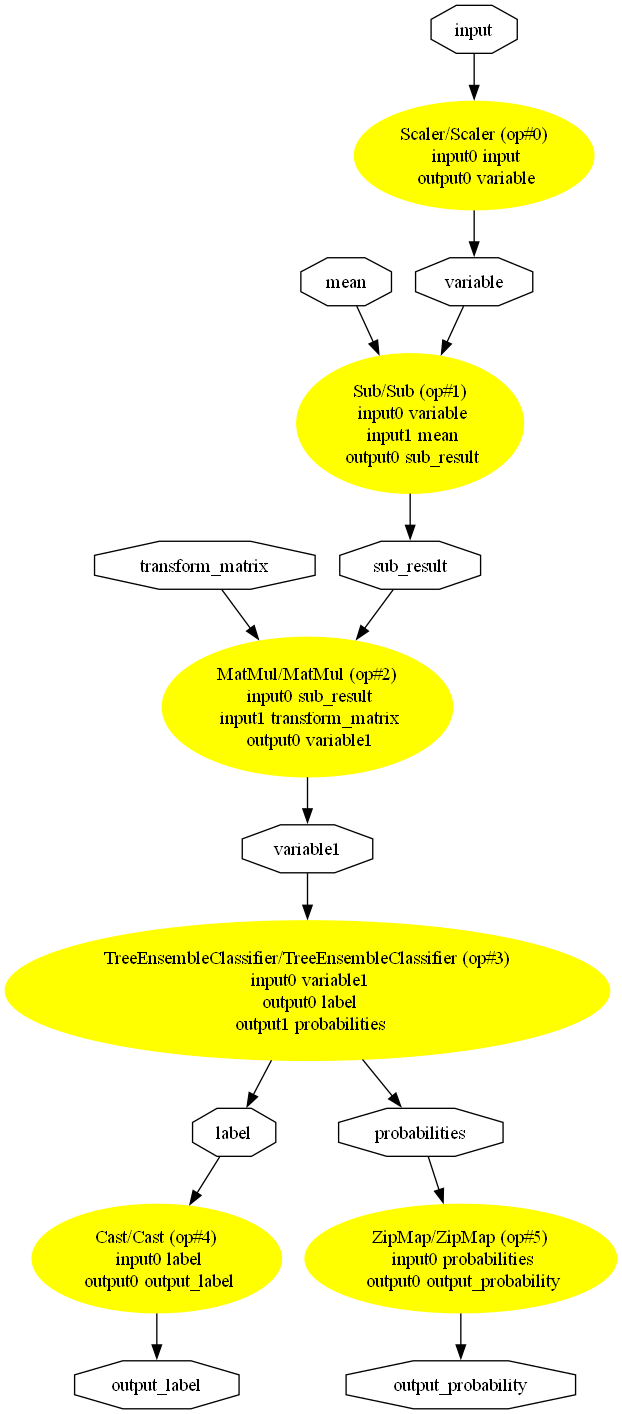

In [10]:
from skl2onnx.helpers.onnx_helper import load_onnx_model
from onnx.tools.net_drawer import GetPydotGraph, GetOpNodeProducer
from IPython.display import Image, display
import graphviz

# Load the ONNX model
onnx_model_path = "optimized_pipeline_rfe_with_pca.onnx"  # Replace with your ONNX model path
onnx_model = load_onnx_model(onnx_model_path)

# Generate the pydot graph
pydot_graph = GetPydotGraph(
    onnx_model.graph,
    name=onnx_model.graph.name,
    rankdir="TB",  # Top-to-bottom layout
    node_producer=GetOpNodeProducer("docstring", color="yellow", fillcolor="yellow", style="filled")
)

# Convert pydot graph to graphviz Source object
graph = graphviz.Source(pydot_graph.to_string())

# Render and display the graph directly in the notebook
display(Image(graph.pipe(format='png')))


In [11]:
import pandas as pd

# Assuming `data` is your dataset
# Calculate skewness for all numerical columns in the dataset
skewness = data.skew()

# Print skewness for each column
print("Skewness of the dataset:")
print(skewness)

# Optionally, you can save this to a DataFrame for easier viewing
skewness_summary = pd.DataFrame({
    'Feature': skewness.index,
    'Skewness': skewness.values
}).sort_values(by='Skewness', ascending=False)

# Display the skewness summary
print("\nSkewness Summary:")
print(skewness_summary)

Skewness of the dataset:
A        0.691133
B       -1.256323
C        0.603650
D       -0.515043
E        0.700554
F       -0.096942
G        0.450722
H        0.698332
I        0.191836
J       -0.335348
K        0.636824
L       -0.420621
M        0.748568
N        0.583845
O        0.451140
Class   -0.574870
dtype: float64

Skewness Summary:
   Feature  Skewness
12       M  0.748568
4        E  0.700554
7        H  0.698332
0        A  0.691133
10       K  0.636824
2        C  0.603650
13       N  0.583845
14       O  0.451140
6        G  0.450722
8        I  0.191836
5        F -0.096942
9        J -0.335348
11       L -0.420621
3        D -0.515043
15   Class -0.574870
1        B -1.256323
